In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as offline
import plotly.graph_objs as go
import math

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-analytics/Train.csv


**VARIABLE DESCRIPTIONS**

1. ID: Customer ID.
2. Warehouse block: Different warehouse blocks present in the company.
3. Mode of shipment: Transport used for shipment.
4. Customer care calls: The number of calls made for enquiry of the shipment.
5. Customer rating: Rating given by customers. 1 is the lowest (Worst), 5 is the highest (Best).
6. Cost of the product: Cost of Product($).
7. Prior purchases: Prior Purchases made by the customer.
8. Product importance: Ordinal description of product being ordered.
9. Gender: Of the customer
10. Discount offered: Discount offered on that specific product.
11. Weight in gms: weight of product in grams.
12. Reached on time: Indicates whether or not shipment has reached on time. (0 is on time and 1 is not on time)

In [2]:
np.random.seed(12345)

In [3]:
ship_df=pd.read_csv('/kaggle/input/customer-analytics/Train.csv',index_col=0)

In [4]:
ship_df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
ship_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10999 entries, 1 to 10999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 1.0+ MB


In [6]:
ship_copy=ship_df.copy()
y=ship_copy['Reached.on.Time_Y.N']
ship_copy.drop(['Reached.on.Time_Y.N'],axis=1,inplace=True)
X=ship_copy

In [7]:
ship_copy.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
ID,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233
2,F,Flight,4,5,216,2,low,M,59,3088
3,A,Flight,2,2,183,4,low,M,48,3374
4,B,Flight,3,3,176,4,medium,M,10,1177
5,C,Flight,2,2,184,3,medium,F,46,2484


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [10]:
X_train.shape

(8799, 10)

In [11]:
y_train.shape

(8799,)

In [12]:
y_test.shape

(2200,)

In [13]:
X_test.shape

(2200, 10)

Data was split into train and test initially to avoid data leakage. Now we will use the test sets for evaluation of best model and train sets for validation and ML process

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8799 entries, 629 to 2733
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      8799 non-null   object
 1   Mode_of_Shipment     8799 non-null   object
 2   Customer_care_calls  8799 non-null   int64 
 3   Customer_rating      8799 non-null   int64 
 4   Cost_of_the_Product  8799 non-null   int64 
 5   Prior_purchases      8799 non-null   int64 
 6   Product_importance   8799 non-null   object
 7   Gender               8799 non-null   object
 8   Discount_offered     8799 non-null   int64 
 9   Weight_in_gms        8799 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 756.2+ KB


In [15]:
X_train.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,8799.000000,8799.000000,8799.000000,8799.000000,8799.000000,8799.000000
mean,4.060007,2.986817,210.014661,3.566428,13.574724,3633.569837
std,1.142313,1.411014,47.923140,1.508290,16.404215,1639.938528
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,170.000000,3.000000,4.000000,1836.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4150.000000
75%,5.000000,4.000000,250.000000,4.000000,10.000000,5064.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


**DATA WRANGLING**

In [16]:
X_train.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')

In [17]:
#renaming columns in X_train and X_test datasets with the help of a dictionary
predictor_cols={'Warehouse_block':'warehouse_block','Mode_of_Shipment':'mode_of_shipment','Customer_care_calls':'customer_care_calls','Customer_rating':'customer_rating','Cost_of_the_Product':'product_cost','Prior_purchases':'prior_purchases','Product_importance':'product_importance','Gender':'gender','Discount_offered':'discount_offered','Weight_in_gms':'weight_gms'}
data=[X_train,X_test]
for sets in data:
    sets.rename(columns=predictor_cols,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4446: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
X_train.columns

Index(['warehouse_block', 'mode_of_shipment', 'customer_care_calls',
       'customer_rating', 'product_cost', 'prior_purchases',
       'product_importance', 'gender', 'discount_offered', 'weight_gms'],
      dtype='object')

In [19]:
X_train['shipment_status']=y_train

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**EXPLORATORY DATA ANALYSIS**

In [20]:
#function to plot a histogram
def histogram(x,label,ylabel,title):
    plt.figure(figsize=(10,6))
    plt.hist(x,label='2015')
    plt.ylabel(ylabel,size=13)
    plt.title(title,size=16)

In [21]:
X_train.head()

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,product_cost,prior_purchases,product_importance,gender,discount_offered,weight_gms,shipment_status
ID,,,,,,,,,,,
629,C,Ship,6,1,104,4,medium,F,23,1442,1
6298,B,Flight,6,1,293,5,medium,F,7,1052,0
9253,D,Ship,3,4,257,4,medium,F,8,4780,0
5366,F,Ship,3,4,213,3,high,F,4,5996,0
10530,F,Road,3,2,235,2,medium,F,9,5116,0


In [22]:
X_train['product_cost'].describe()

count    8799.000000
mean      210.014661
std        47.923140
min        96.000000
25%       170.000000
50%       214.000000
75%       250.000000
max       310.000000
Name: product_cost, dtype: float64

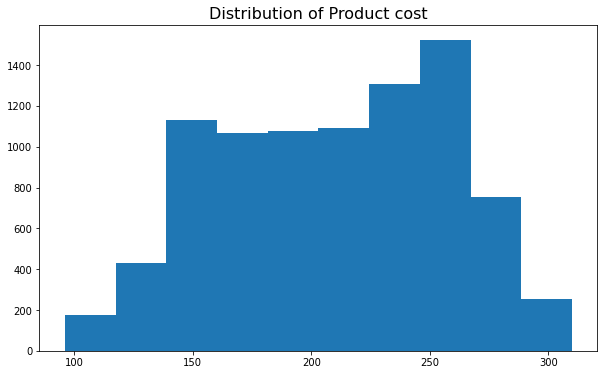

In [23]:
histogram(X_train['product_cost'],None,None,'Distribution of Product cost')

**Which mode of transport could be preferred to ensure shipments are delivered on time?**

In [24]:
offline.init_notebook_mode(connected=True)

In [25]:
X_train.groupby(['mode_of_shipment','shipment_status'])['shipment_status'].count()

mode_of_shipment  shipment_status
Flight            0                   560
                  1                   849
Road              0                   584
                  1                   822
Ship              0                  2384
                  1                  3600
Name: shipment_status, dtype: int64

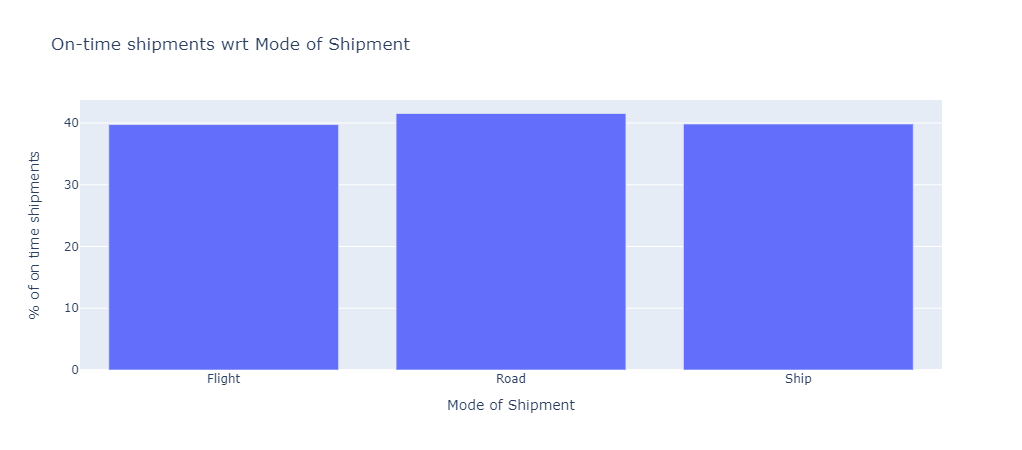

In [26]:
#trace1=go.Bar(x=['Flight','Road','Ship'],y=[849,822,3600],name='Not on time')
trace1=go.Bar(x=['Flight','Road','Ship'],y=[(560/1409)*100,(584/1406)*100,(2384/5984)*100])
trans_bar=[trace1]
layout=dict(title='On-time shipments wrt Mode of Shipment',xaxis=dict(title='Mode of Shipment'),yaxis=dict(title='% of on time shipments'),barmode='stack')
fig=dict(data=trans_bar,layout=layout)
offline.iplot(fig)

#can try for anova to test if mean difference is significant.

Shipments via Road have a better success rate of reaching on time as compared to other mode of transport.

**Which warehouse block contributed to the most no. of shipments reaching on time?**

In [27]:
X_train.groupby(['warehouse_block','shipment_status'])['shipment_status'].count()

warehouse_block  shipment_status
A                0                   592
                 1                   856
B                0                   588
                 1                   899
C                0                   578
                 1                   854
D                0                   601
                 1                   894
F                0                  1169
                 1                  1768
Name: shipment_status, dtype: int64

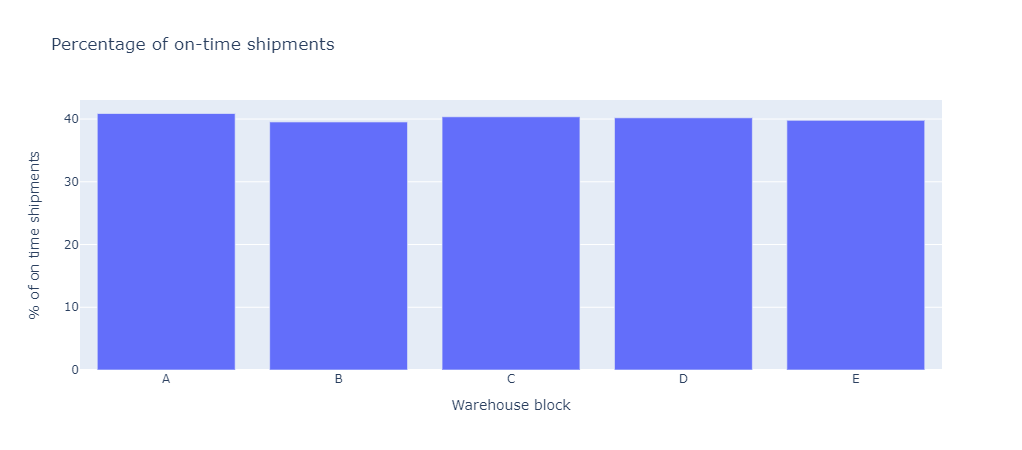

In [28]:
trace2=go.Bar(x=['A','B','C','D','E','F'],y=[(592/1448)*100,(588/1487)*100,(578/1432)*100,(601/1495)*100,(1169/2937)*100])
trans_bar=[trace2]
layout=dict(title='Percentage of on-time shipments',xaxis=dict(title='Warehouse block'),yaxis=dict(title='% of on time shipments'),barmode='stack')
fig=dict(data=trans_bar,layout=layout)
offline.iplot(fig)

Shipments coming from all the warehouses have an equal "on time success rate"

**Is product importance affecting shipment deliveries?**

In [29]:
X_train.groupby(['product_importance','shipment_status'])['shipment_status'].count()

product_importance  shipment_status
high                0                   256
                    1                   497
low                 0                  1745
                    1                  2527
medium              0                  1527
                    1                  2247
Name: shipment_status, dtype: int64

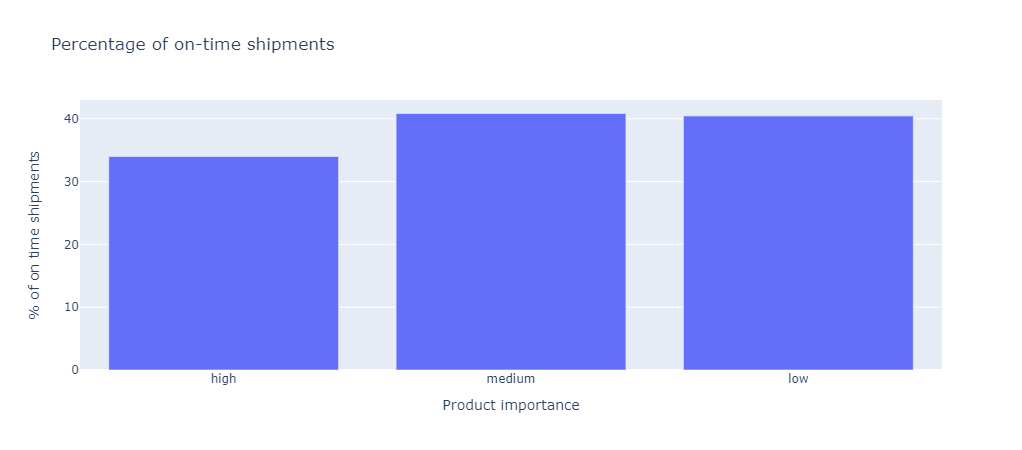

In [30]:
trace3=go.Bar(x=['high','medium','low'],y=[(256/753)*100,(1745/4272)*100,(1527/3774)*100])
trans_bar=[trace3]
layout=dict(title='Percentage of on-time shipments',xaxis=dict(title='Product importance'),yaxis=dict(title='% of on time shipments'),barmode='stack')
fig=dict(data=trans_bar,layout=layout)
offline.iplot(fig)

Products classified as being of high importance are delivered on time 34% of the times, which is significantly lower as compared to other categories of products.

**Influence of shipment status on customer ratings**

In [31]:
X_train.head()
X_train['customer_rating'].unique()

array([1, 4, 2, 5, 3])

In [32]:
X_train.groupby(['customer_rating','shipment_status'])['shipment_status'].count()

customer_rating  shipment_status
1                0                   748
                 1                  1051
2                0                   692
                 1                  1017
3                0                   711
                 1                  1100
4                0                   704
                 1                  1065
5                0                   673
                 1                  1038
Name: shipment_status, dtype: int64

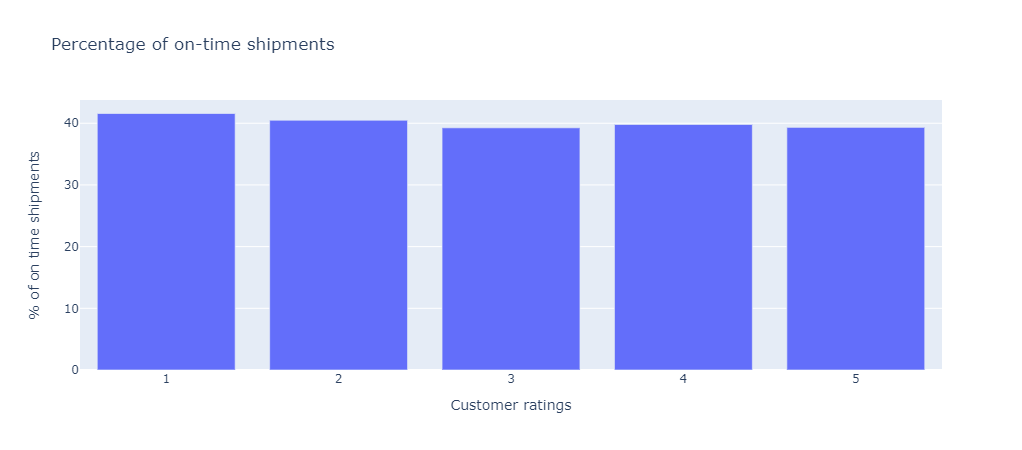

In [33]:
trace4=go.Bar(x=['1','2','3','4','5'],y=[(748/1799)*100,(692/1709)*100,(711/1811)*100,(704/1769)*100,(673/1711)*100])
trans_bar=[trace4]
layout=dict(title='Percentage of on-time shipments',xaxis=dict(title='Customer ratings'),yaxis=dict(title='% of on time shipments'),barmode='stack')
fig=dict(data=trans_bar,layout=layout)
offline.iplot(fig)

Customer ratings don't seem to depend much on the shipment status, as the on-time delivery rate of products across all ratings given by the customers don't differ significantly. The reasons for lower customer ratings given to the company are not dependent on shipment status.

**Are customer ratings influenced by the discount prices?**

In [34]:
X_train.groupby(['customer_rating'])['discount_offered'].mean()

customer_rating
1    13.421345
2    13.916325
3    13.219216
4    13.599209
5    13.745763
Name: discount_offered, dtype: float64

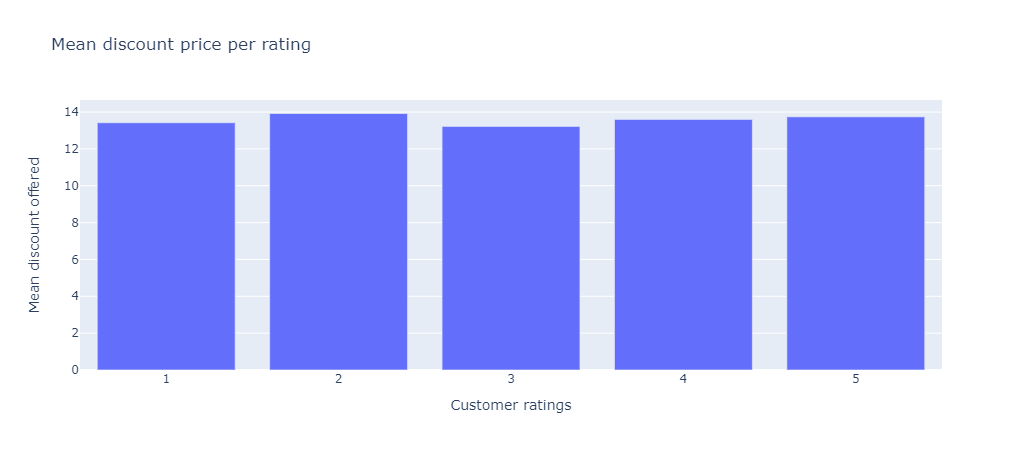

In [35]:
trace5=go.Bar(x=['1','2','3','4','5'],y=[13.42,13.92,13.22,13.60,13.74])
trans_bar=[trace5]
layout=dict(title='Mean discount price per rating',xaxis=dict(title='Customer ratings'),yaxis=dict(title='Mean discount offered'),barmode='stack')
fig=dict(data=trans_bar,layout=layout)
offline.iplot(fig)

Customer ratings aren't affected significantly by the discount price offered.

In [36]:
X_train.head()

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,product_cost,prior_purchases,product_importance,gender,discount_offered,weight_gms,shipment_status
ID,,,,,,,,,,,
629,C,Ship,6,1,104,4,medium,F,23,1442,1
6298,B,Flight,6,1,293,5,medium,F,7,1052,0
9253,D,Ship,3,4,257,4,medium,F,8,4780,0
5366,F,Ship,3,4,213,3,high,F,4,5996,0
10530,F,Road,3,2,235,2,medium,F,9,5116,0


**Are products with high prices having a better on-time shipment rate?**

<Figure size 720x432 with 0 Axes>

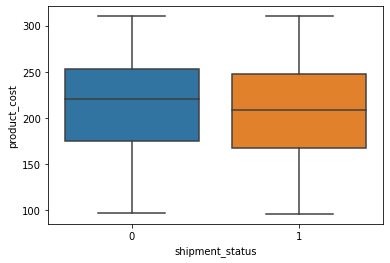

<Figure size 720x432 with 0 Axes>

In [37]:
sns.boxplot(x=X_train['shipment_status'],y=X_train['product_cost'])
plt.figure(figsize=(10,6))

We observe from the above boxplot that, on an average, products with higher costs have a better on-time delivery rate

**Which mode of transport yields maximum number of customer calls?**

In [38]:
X_train.groupby(['mode_of_shipment'])['customer_care_calls'].mean()

mode_of_shipment
Flight    4.127040
Road      4.066856
Ship      4.042614
Name: customer_care_calls, dtype: float64

**Variation of factors with gender**

In [39]:
#function to plot a countplot
def count(a,b,data):
    plt.figure(figsize=(10,6))
    sns.countplot(x=a,data=data,hue=b)

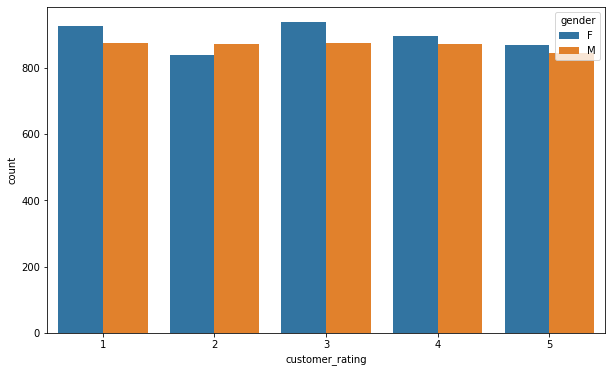

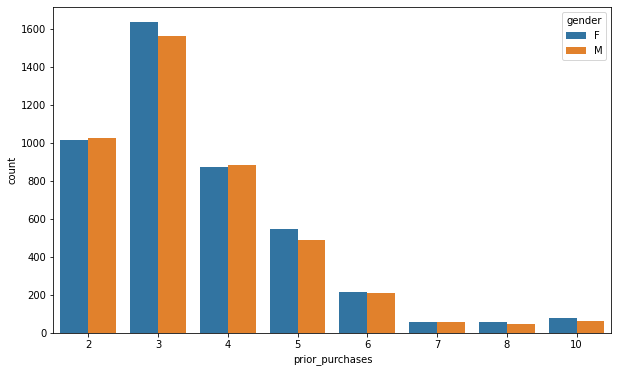

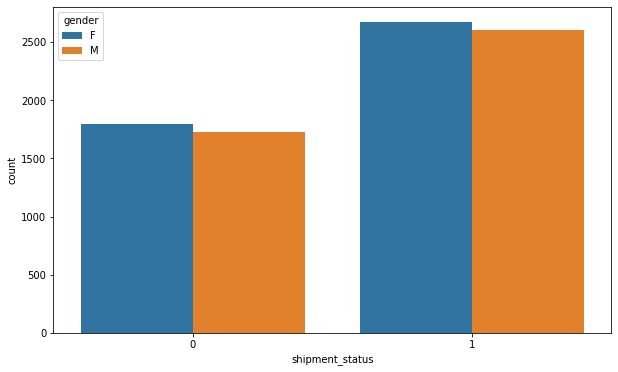

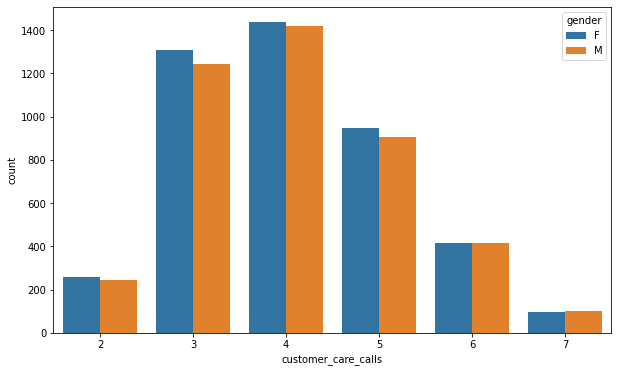

In [40]:
cols=['customer_rating','prior_purchases','shipment_status','customer_care_calls']
for col in cols:
    count(col,'gender',data=X_train)

No significant difference is observed in the company's service to any gender.

**Influence of warehouses on various factors in the dataset**

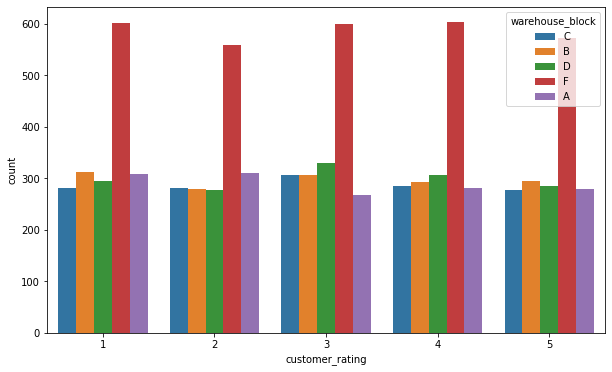

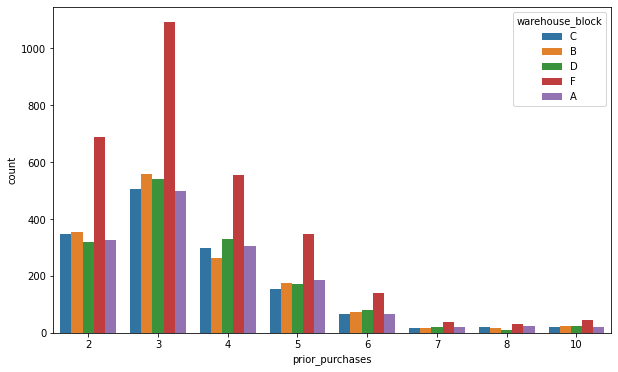

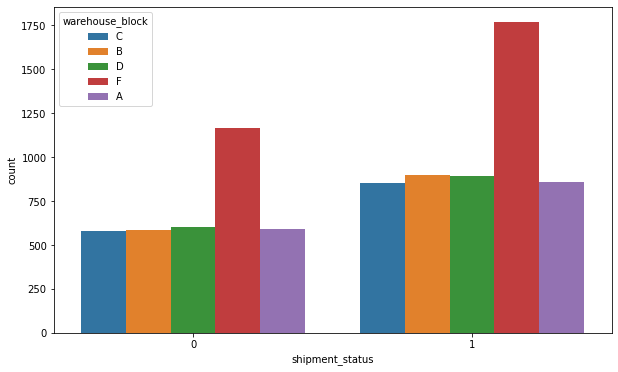

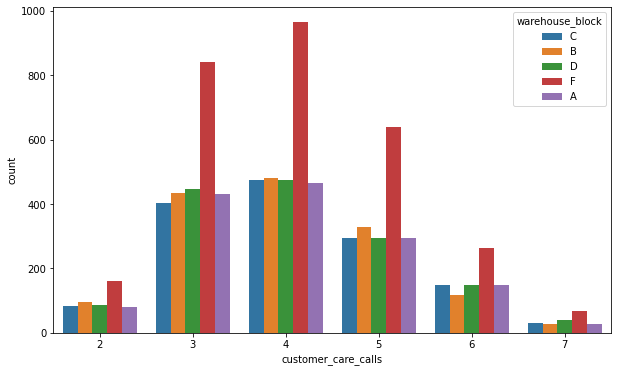

In [41]:
for col in cols:
    count(col,'warehouse_block',X_train)

Warehouse block F is clearly the most busiest one in terms of shipping goods. On-time delivery rate is significantly higher for warehouse block F as compared to other blocks. Most of the purchases made by customers have come from block F.

**Which warehouse block and mode of shipment together is the most efficient in terms of deliveries?**

In [42]:
X_train_1=X_train.copy()
X_train_1['shipment_status']=1-X_train_1['shipment_status']
#for this dataset, 1 indicates delivery was on time and 0 indicates it was not on time

In [43]:
X_train_1.groupby(['warehouse_block','mode_of_shipment'])['shipment_status'].mean()

warehouse_block  mode_of_shipment
A                Flight              0.415584
                 Road                0.432773
                 Ship                0.401430
B                Flight              0.396624
                 Road                0.397541
                 Ship                0.394632
C                Flight              0.367257
                 Road                0.434783
                 Ship                0.404713
D                Flight              0.431535
                 Road                0.411765
                 Ship                0.392717
F                Flight              0.386076
                 Road                0.407895
                 Ship                0.398605
Name: shipment_status, dtype: float64

Warehouse C was the most efficient in shipping goods via Road and Ships, Warehouse D was the most efficient in shipping goods by flight. 

In [44]:
#calculating average efficiency of on-time delivery for all warehouses
X_train_1.groupby(['warehouse_block'])['shipment_status'].mean()

warehouse_block
A    0.408840
B    0.395427
C    0.403631
D    0.402007
F    0.398025
Name: shipment_status, dtype: float64

In [45]:
X_train.head()

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,product_cost,prior_purchases,product_importance,gender,discount_offered,weight_gms,shipment_status
ID,,,,,,,,,,,
629,C,Ship,6,1,104,4,medium,F,23,1442,1
6298,B,Flight,6,1,293,5,medium,F,7,1052,0
9253,D,Ship,3,4,257,4,medium,F,8,4780,0
5366,F,Ship,3,4,213,3,high,F,4,5996,0
10530,F,Road,3,2,235,2,medium,F,9,5116,0


<Figure size 792x576 with 0 Axes>

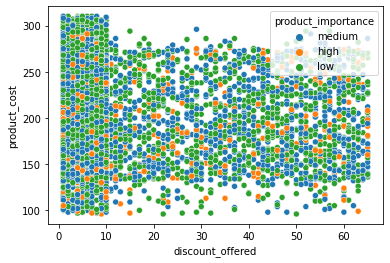

<Figure size 792x576 with 0 Axes>

In [46]:
sns.scatterplot(x='discount_offered',y='product_cost',data=X_train,hue='product_importance')
plt.figure(figsize=(11,8))

**FEATURE SELECTION PROCESS**

Lets begin the feature selection process with Mutual Information

In [48]:
from sklearn.feature_selection import mutual_info_classif
X_train_copy=X_train.copy()
y_train_copy=X_train_copy.pop("shipment_status")
for colname in X_train_copy.select_dtypes("object"):
    X_train_copy[colname],_=X_train_copy[colname].factorize()
discrete_features = X_train_copy.dtypes == int

In [50]:
def mi_scores(X, y, discrete_features):
    mi_scores=mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores=pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores=mi_scores.sort_values(ascending=False)
    return mi_scores
mi_scores=mi_scores(X_train_copy, y_train_copy, discrete_features)
mi_scores

weight_gms             0.323007
discount_offered       0.150896
product_cost           0.015049
prior_purchases        0.006374
customer_care_calls    0.002909
product_importance     0.000745
customer_rating        0.000157
mode_of_shipment       0.000082
warehouse_block        0.000041
gender                 0.000005
Name: MI Scores, dtype: float64

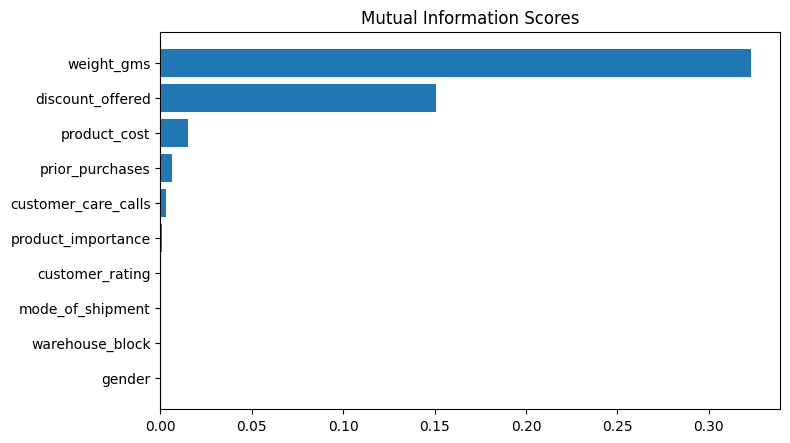

In [51]:
def plot_mi_scores(scores):
    scores =scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

Mutual information shows the following scores for each feature. weight and discount offered are classified as important in predicting the shipment status whereas for the others I will try feature engineering to extract important insights.

In [53]:
X_train_2=X_train_1.copy()
X_train_2['calls_per_order']=X_train_2['customer_care_calls']/X_train_2['prior_purchases']
X_train_2['calls_per_order'].describe()

count    8799.000000
mean        1.279592
std         0.500437
min         0.200000
25%         1.000000
50%         1.333333
75%         1.500000
max         3.000000
Name: calls_per_order, dtype: float64

<Figure size 720x432 with 0 Axes>

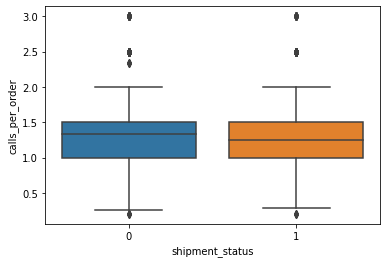

<Figure size 720x432 with 0 Axes>

In [54]:
sns.boxplot(x='shipment_status',y='calls_per_order',data=X_train_2)
plt.figure(figsize=(10,6))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



KeyError: 10

In [56]:
X_train_2['calls_per_order']

ID
629      1.500000
6298     1.200000
9253     0.750000
5366     1.000000
10530    1.500000
           ...   
4860     2.500000
3265     2.000000
9846     1.333333
10800    0.666667
2733     1.333333
Name: calls_per_order, Length: 8799, dtype: float64